# Analizando datos del COVID-19 con Pandas

Este es un ejercicio que hago porque una de mis asignaturas pendientes es familiarizarme con Pandas. Más de una vez lo he usado, acabo tirando de buscador y hago lo que necesito, pero nunca he llegado a familiarizarme tanto con la librería como para estar cómodo con ella. 

Así que decidí aprovechar el COVID-19 y manejar sus datos, es más atractivo gestionar datos reales, y hacerlo en este Notebook y si a ti también te sirve ¡genial!

Un mínimo conocimiento de Python y de como funciona el entorno Jupyter sería necesario pero en realidad muy poco :-)

## Cargar y analizardatos rápidamente


Primero cargamos la librería Pandas que nos permitirá analizar y manipular datos.
Una práctica habitual es llamarla `pd` 

Luego definimos en una variable la URL a los datos que vamos a usar.

In [1]:
import pandas as pd
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'

A continuación con el método `read_csv` leemos los datos (desde hace muchas versiones le puedes pasar directamente una URL como estamos haciendo en este caso). Lo ideal sería tener una copia local de los datos pero para simplificar lo dejaremos así.

El método devolverá los datos como un `DataFrame` que es la estructura de datos principal de Pandas, una representación de los datos en filas y columnas, algo parecido a lo que tendrías en una hoja de cálculo si importaras los datos.

In [2]:
covid = pd.read_csv(url)

Ahora que el contenido de la variable `covid` es un *DataFrame* podemos utilizar el método `head` para ver las primeras filas.

Podemos ver como el *DataFrame* usa el csv para generar los nombres de las columnas, más adelante veremos como referenciarlas o filtrar por ellas.

Podemos ver que automáticamente se añade una primera columna que es el índice.

In [3]:
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,09/04/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
1,08/04/2020,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
2,07/04/2020,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
3,06/04/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
4,05/04/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0


Con la propiedad `columns` de un *DataFrame* podemos ver la lista de columnas, en caso de que `head` no nos ayude o querramos tratarla en nuestro programa.

In [4]:
covid.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018'],
      dtype='object')

También podemos estar interesado en la forma que tienen nuestros datos, para ello podemos usar la propiedad `shape` del *DataFrame* y tener el tamaño de los datos en la forma (número de filas, número de columnas)

In [5]:
covid.shape

(9717, 10)

Otro método interesante para analizar los datos es `describe` que nos permite sacar algunos datos estadísticos de las columnas numéricas y obtener alguna idea sobre los datos qué estamos manejando, aunque en este caso no son tan interesantes (quiźas nos pueda servir el *count* y *max* de las variables `cases` o `deaths`)

In [6]:
covid.describe()

,day,month,year,cases,deaths,popData2018
count,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9.569000e+03
mean,15.411341,2.621385,2019.993105,151.983019,9.037357,6.375818e+07
std,9.374690,1.287272,0.082754,1184.675208,74.966368,2.005423e+08
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,1.000000e+03
25%,7.000000,2.000000,2020.000000,0.000000,0.000000,3.449299e+06
50%,15.000000,3.000000,2020.000000,0.000000,0.000000,1.028176e+07
75%,24.000000,3.000000,2020.000000,14.000000,0.000000,4.222843e+07
max,31.000000,12.000000,2020.000000,34272.000000,2004.000000,1.392730e+09


## Filtrando y ordenando datos

Genial, pero empieza a ser un poco engorroso ver los datos así ¿no podemos representarlos de alguna forma u ordenarlos aunque sea? Por supuesto :)

Podemos empezar seleccionando sólo las columnas que nos interesan, sólo estamos interesados en las muertes ¿no?

In [7]:
covid['deaths']

0       3
1       4
2       0
3       2
4       1
5       0
6       0
7       0
8       0
9       0
10      1
11      1
12      1
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9687    0
9688    0
9689    0
9690    0
9691    0
9692    0
9693    0
9694    0
9695    0
9696    0
9697    1
9698    0
9699    0
9700    0
9701    0
9702    0
9703    0
9704    0
9705    0
9706    0
9707    0
9708    0
9709    0
9710    0
9711    0
9712    0
9713    1
9714    0
9715    0
9716    0
Name: deaths, Length: 9717, dtype: int64

Las columnas pueden ser accedidas como métodos, pero en nuestro caso lo usaremos como índices porque así nos permite gestionar cualquier nombre de columna aunque contenga caracteres no válidos en el nombre de una propiedad (como espacios o -) y porque nos es más fácil añadir varias columnas. Pero por si ves la notación en otros sitios que sepas que lo siguiente es igual y lo comprobamos con el método `equals` que nos permite comparar *DataFrames*

In [8]:
covid['deaths'].equals(covid.deaths)

True

Bueno sólo las muertes no, estaríamos interesados también en algunas otras columnas y no hay ningún problema, al índice en vez de una columna le podemos pasar una lista de columnas y nos devolverá un *DataFrame* sólo con esas columnas:

In [9]:
covid[['dateRep', 'countriesAndTerritories', 'deaths']]

,dateRep,countriesAndTerritories,deaths
0,09/04/2020,Afghanistan,3
1,08/04/2020,Afghanistan,4
2,07/04/2020,Afghanistan,0
3,06/04/2020,Afghanistan,2
4,05/04/2020,Afghanistan,1
5,04/04/2020,Afghanistan,0
6,03/04/2020,Afghanistan,0
7,02/04/2020,Afghanistan,0
8,01/04/2020,Afghanistan,0
9,31/03/2020,Afghanistan,0


Podemos por ejemplo buscar los días con más mortalidad filtrando y ordenando. Para ello le pasamos a nuestro *DataFrame* `covid` la condición, en este caso buscamos los días con más de 1000 muertos.

In [10]:
covid[covid['deaths'] > 1000]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
3188,08/04/2020,8,4,2020,3777,1417,France,FR,FRA,66987244.0
3191,05/04/2020,5,4,2020,4267,1053,France,FR,FRA,66987244.0
3192,04/04/2020,4,4,2020,5233,2004,France,FR,FRA,66987244.0
9384,09/04/2020,9,4,2020,33323,1922,United_States_of_America,US,USA,327167434.0
9385,08/04/2020,8,4,2020,30613,1906,United_States_of_America,US,USA,327167434.0
9386,07/04/2020,7,4,2020,30561,1342,United_States_of_America,US,USA,327167434.0
9387,06/04/2020,6,4,2020,25398,1146,United_States_of_America,US,USA,327167434.0
9388,05/04/2020,5,4,2020,34272,1344,United_States_of_America,US,USA,327167434.0
9389,04/04/2020,4,4,2020,32425,1104,United_States_of_America,US,USA,327167434.0
9391,02/04/2020,2,4,2020,27103,1059,United_States_of_America,US,USA,327167434.0


¿Y cómo ha funcionado eso? Si vemos estamos pasando el resultado de una comparación como índice. Esa comparación que hacemos `covid['deaths'] > 1000` devuelve una serie de valores *booleanos* que cuando se la pasamos como índice al *DataFrame* nos devuelve sólo el subconjunto de filas que verifican esa condición.

Como tenemos el *DataFrame* quizás querramos ordenarlo, para ello tenemos la función `sort_values`. De esta manera tan simple vemos como es muy sencillo filtrar y ordenar los valores de un *DataFrame* 

In [11]:
covid[covid['deaths'] > 1000].sort_values('deaths')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
3191,05/04/2020,5,4,2020,4267,1053,France,FR,FRA,66987244.0
9391,02/04/2020,2,4,2020,27103,1059,United_States_of_America,US,USA,327167434.0
9389,04/04/2020,4,4,2020,32425,1104,United_States_of_America,US,USA,327167434.0
9387,06/04/2020,6,4,2020,25398,1146,United_States_of_America,US,USA,327167434.0
9386,07/04/2020,7,4,2020,30561,1342,United_States_of_America,US,USA,327167434.0
9388,05/04/2020,5,4,2020,34272,1344,United_States_of_America,US,USA,327167434.0
3188,08/04/2020,8,4,2020,3777,1417,France,FR,FRA,66987244.0
9385,08/04/2020,8,4,2020,30613,1906,United_States_of_America,US,USA,327167434.0
9384,09/04/2020,9,4,2020,33323,1922,United_States_of_America,US,USA,327167434.0
3192,04/04/2020,4,4,2020,5233,2004,France,FR,FRA,66987244.0


Ahora estaréis pensando que el número absoluto de muertes no es un dato tan interesante, depende mucho del número de casos y sobre todo de la población. Como el dato de la población por ahora no lo tenemos en nuestros datos, vamos a calcular el índice de mortalidad en cada país. ¿Cómo haríamos eso? Con dividir las muertes por los casos debería bastar, y en Pandas no necesitas más con un *DataFrame*.

In [12]:
covid['mortality'] = covid['deaths'] / covid['cases']
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,mortality
0,09/04/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0,0.053571
1,08/04/2020,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0,0.133333
2,07/04/2020,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0,0.000000
3,06/04/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,0.068966
4,05/04/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,0.028571


Nota: Para evitar unos *warning* al operar con un DataFrame con *NaN*, cambiaremos todos esos *NaN* por 0 usando el método `fillna` y antes de ello todos los *Inf* por *NaN*, pero puesto que *Inf* está definido en numpy (otra librería usada por Pandas) tendremos que importarla y es una práctica habitual importarla como np.

In [13]:
import numpy as np
covid = covid.replace(np.inf, np.nan).fillna(0)

Ahora que hemos añadido una nueva columna `mortality` vemos como hay valores *NaN* (Not a Number) que vienen de dividir entre 0, lo interesante es que Pandas no ha soltado una excepción lo que nos permite manipular los datos con cierta tranquilidad, pero debemos saber lo que estamos haciendo.

En este caso podéis ver también como a `sort_values` se le pasa el argumento `ascending` para cambiar el orden y hacerlo descendente.

In [14]:
covid[covid['deaths'] > 1000].sort_values('mortality', ascending=False)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,mortality
3192,04/04/2020,4,4,2020,5233,2004,France,FR,FRA,66987244.0,0.382954
3188,08/04/2020,8,4,2020,3777,1417,France,FR,FRA,66987244.0,0.375165
3191,05/04/2020,5,4,2020,4267,1053,France,FR,FRA,66987244.0,0.246778
9385,08/04/2020,8,4,2020,30613,1906,United_States_of_America,US,USA,327167434.0,0.062261
9384,09/04/2020,9,4,2020,33323,1922,United_States_of_America,US,USA,327167434.0,0.057678
9387,06/04/2020,6,4,2020,25398,1146,United_States_of_America,US,USA,327167434.0,0.045122
9386,07/04/2020,7,4,2020,30561,1342,United_States_of_America,US,USA,327167434.0,0.043912
9388,05/04/2020,5,4,2020,34272,1344,United_States_of_America,US,USA,327167434.0,0.039216
9391,02/04/2020,2,4,2020,27103,1059,United_States_of_America,US,USA,327167434.0,0.039073
9389,04/04/2020,4,4,2020,32425,1104,United_States_of_America,US,USA,327167434.0,0.034048


## Agrupando datos

Una función interesante es agrupar los valores de un *DataFrame*, lo que nos devolverá un *DataFrameGroupBy*, bastante similar pero agrupado. Para ello vamos a crear otra variable `covid_by_country` con los datos del *DataFrame* que tenemos en `covid` pero agrupado por el nombre del país (quizás tendría más sentido usar el `geoId` pero por hacer más humana la representación usaré la columna `countriesAndTerritories`)

Si usas `covid_by_country.describe()` podrás ver como la representación cambia con respecto a la descripción que hemos visto abajo, los datos están ordenados por filas en las que cada fila representa un grupo y las columnas están agrupadas en 2 niveles, un primer nivel es el nombre de la columna original y el segundo nivel es el valor estadístico de esa variable para ese grupo. Esta información podría ser más interesante.

In [15]:
covid_by_country = covid.groupby('countriesAndTerritories')
covid_by_country.describe()

cases                                 \
                                   count         mean          std  min   
countriesAndTerritories                                                   
Afghanistan                         91.0     4.648352    11.218411  0.0   
Albania                             32.0    12.500000     8.519428  0.0   
Algeria                             96.0    16.375000    48.086818  0.0   
Andorra                             27.0    20.888889    13.787769  0.0   
Angola                              19.0     1.000000     1.201850  0.0   
Anguilla                            14.0     0.214286     0.578934  0.0   
Antigua_and_Barbuda                 21.0     0.714286     1.585650  0.0   
Argentina                           34.0    52.794118    53.343813  0.0   
Armenia                             92.0     9.576087    19.364766  0.0   
Aruba                               18.0     4.277778     5.210911  0.0   
Australia                          101.0    59.920792   127.812729  0.0   
Austria                            101.0   128.405941   240.723043  0.0   
Azerbaijan                          94.0     8.744681    20.586527  0.0   
Bahamas                             23.0     1.739130     1.789296  0.0   
Bahrain                            100.0     8.230000    15.929678  0.0   
Bangladesh                          26.0     8.384615    13.752314  0.0   
Barbados                            23.0     2.739130     3.136550  0.0   
Belarus                             93.0    11.462366    37.306183  0.0   
Belgium                            101.0   231.712871   468.329101  0.0   
Belize                              17.0     0.470588     0.624264  0.0   
Benin                               24.0     1.083333     1.791688  0.0   
Bermuda                             21.0     1.857143     2.495711  0.0   
Bhutan                              27.0     0.185185     0.395847  0.0   
Bolivia                             28.0     9.428571    11.066896  0.0   
Bonaire, Saint Eustatius and Saba    8.0     0.250000     0.707107  0.0   
Bosnia_and_Herzegovina              28.0    29.142857    24.655725  0.0   
Botswana                             9.0     0.777778     1.092906  0.0   
Brazil                              98.0   162.520408   389.789111  0.0   
British_Virgin_Islands              14.0     0.214286     0.578934  0.0   
Brunei_Darussalam                   30.0     4.500000     4.240608  0.0   
...                                  ...          ...          ...  ...   
South_Korea                        101.0   103.198020   174.726759  0.0   
South_Sudan                          4.0     0.500000     0.577350  0.0   
Spain                              101.0  1452.376238  2679.121292  0.0   
Sri_Lanka                           92.0     2.054348     4.120077  0.0   
Sudan                               27.0     0.518519     0.848998  0.0   
Suriname                            21.0     0.476190     1.030488  0.0   
Sweden                             101.0    83.356436   155.323507  0.0   
Switzerland                        101.0   224.851485   395.193431  0.0   
Syria                               18.0     1.055556     1.862074  0.0   
Taiwan                              99.0     3.828283     7.160037  0.0   
Thailand                            94.0    25.776596    54.237462  0.0   
Timor_Leste                         19.0     0.052632     0.229416  0.0   
Togo                                27.0     2.592593     3.272957  0.0   
Trinidad_and_Tobago                 28.0     3.821429     7.463757  0.0   
Tunisia                             32.0    19.468750    20.793895  0.0   
Turkey                              27.0  1415.777778  1356.327942  1.0   
Turks_and_Caicos_islands            16.0     0.500000     1.032796  0.0   
Uganda                              19.0     2.789474     4.441958  0.0   
Ukraine                             27.0    61.777778    70.830965  0.0   
United_Arab_Emirates                95.0    27.989474    84.

Ya hemos manipulado en filas agrupando, pero tanto un *DataFrame* como un *DataFrameGroupBy* pueden ser manipulados por columnas, por ejemplo puedo interesarme sólo por las muertes:

In [16]:
covid_by_country['deaths'].describe()

,count,mean,std,min,25%,50%,75%,max
countriesAndTerritories,,,,,,,,
Afghanistan,91.0,0.153846,0.594850,0.0,0.0,0.0,0.00,4.0
Albania,32.0,0.687500,0.931094,0.0,0.0,0.0,1.00,3.0
Algeria,96.0,2.135417,6.904796,0.0,0.0,0.0,0.00,47.0
Andorra,27.0,0.851852,1.133534,0.0,0.0,0.0,1.00,4.0
Angola,19.0,0.105263,0.458831,0.0,0.0,0.0,0.00,2.0
Anguilla,14.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Antigua_and_Barbuda,21.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Argentina,34.0,1.911765,2.366018,0.0,0.0,1.0,3.00,7.0
Armenia,92.0,0.097826,0.420878,0.0,0.0,0.0,0.00,3.0


O puedo incluso escoger variaas columnas si quiero, en este caso las variables de `deaths` y `cases` me parecen interesantes.

In [17]:
covid_by_country[['deaths', 'cases']].describe()

deaths                                    \
                                   count        mean         std  min  25%   
countriesAndTerritories                                                      
Afghanistan                         91.0    0.153846    0.594850  0.0  0.0   
Albania                             32.0    0.687500    0.931094  0.0  0.0   
Algeria                             96.0    2.135417    6.904796  0.0  0.0   
Andorra                             27.0    0.851852    1.133534  0.0  0.0   
Angola                              19.0    0.105263    0.458831  0.0  0.0   
Anguilla                            14.0    0.000000    0.000000  0.0  0.0   
Antigua_and_Barbuda                 21.0    0.000000    0.000000  0.0  0.0   
Argentina                           34.0    1.911765    2.366018  0.0  0.0   
Armenia                             92.0    0.097826    0.420878  0.0  0.0   
Aruba                               18.0    0.000000    0.000000  0.0  0.0   
Australia                          101.0    0.495050    1.253984  0.0  0.0   
Austria                            101.0    2.702970    6.442895  0.0  0.0   
Azerbaijan                          94.0    0.085106    0.316553  0.0  0.0   
Bahamas                             23.0    0.304348    0.558796  0.0  0.0   
Bahrain                            100.0    0.050000    0.219043  0.0  0.0   
Bangladesh                          26.0    0.769231    1.274604  0.0  0.0   
Barbados                            23.0    0.130435    0.344350  0.0  0.0   
Belarus                             93.0    0.139785    0.731160  0.0  0.0   
Belgium                            101.0   22.178218   60.632730  0.0  0.0   
Belize                              17.0    0.058824    0.242536  0.0  0.0   
Benin                               24.0    0.041667    0.204124  0.0  0.0   
Bermuda                             21.0    0.142857    0.478091  0.0  0.0   
Bhutan                              27.0    0.000000    0.000000  0.0  0.0   
Bolivia                             28.0    0.642857    1.061595  0.0  0.0   
Bonaire, Saint Eustatius and Saba    8.0    0.000000    0.000000  0.0  0.0   
Bosnia_and_Herzegovina              28.0    1.250000    1.506160  0.0  0.0   
Botswana                             9.0    0.111111    0.333333  0.0  0.0   
Brazil                              98.0    8.163265   22.663242  0.0  0.0   
British_Virgin_Islands              14.0    0.000000    0.000000  0.0  0.0   
Brunei_Darussalam                   30.0    0.033333    0.182574  0.0  0.0   
...                                  ...         ...         ...  ...  ...   
South_Korea                        101.0    2.019802    2.701778  0.0  0.0   
South_Sudan                          4.0    0.000000    0.000000  0.0  0.0   
Spain                              101.0  144.108911  287.972773  0.0  0.0   
Sri_Lanka                           92.0    0.076087    0.266590  0.0  0.0   
Sudan                               27.0    0.074074    0.266880  0.0  0.0   
Suriname                            21.0    0.047619    0.218218  0.0  0.0   
Sweden                             101.0    6.801980   19.429369  0.0  0.0   
Switzerland                        101.0    6.980198   16.590347  0.0  0.0   
Syria                               18.0    0.111111    0.323381  0.0  0.0   
Taiwan                              99.0    0.050505    0.331162  0.0  0.0   
Thailand                            94.0    0.340426    0.956620  0.0  0.0   
Timor_Leste                         19.0    0.000000    0.000000  0.0  0.0   
Togo                                27.0    0.111111    0.320256  0.0  0.0   
Trinidad_and_Tobago                 28.0    0.285714    0.534522  0.0  0.0   
Tunisia                             32.0    0.718750    1.197696  0.0  0.0   
Turkey                              27.0   30.074074   31.637278  0.0  4.0   
Turks_and_Caicos_islands            16.0    0.062500    0.250000  0.0  0.0   
Uganda                              19.0    0.000000    

Está bien que describe nos de los datos, pero ¿y si los queremos tener nosotros? Sin problemas, podemos escoger una columna y sumarla de una forma bastante intuitiva (estamos usando la función `sum` pero también tienes disponibles `mean` para la media, `max` para el máximo, `std` para calcular la desviación estándar y muchas más)

Tengamos en cuenta que esas funciones nos devolverán una *Serie* y no un *DataFrame* con lo que los resultados no son tan manipulables.

In [18]:
covid_by_country['deaths'].sum()

countriesAndTerritories
Afghanistan                             14
Albania                                 22
Algeria                                205
Andorra                                 23
Angola                                   2
Anguilla                                 0
Antigua_and_Barbuda                      0
Argentina                               65
Armenia                                  9
Aruba                                    0
Australia                               50
Austria                                273
Azerbaijan                               8
Bahamas                                  7
Bahrain                                  5
Bangladesh                              20
Barbados                                 3
Belarus                                 13
Belgium                               2240
Belize                                   1
Benin                                    1
Bermuda                                  3
Bhutan                        

Pero si en vez de tener una *Serie* queremos un *DataFrame* podemos usar el método `agg` al que le decimos que operación queremos hacer en qué columna y nos devolverá un DataFrame con los datos agregados. Ten en cuenta que este nuevo *DataFrame* utilizará el valor de agregación como índice y sólo tendrá como columna el valor agregado.

In [19]:
deaths_by_country = covid_by_country.agg({'deaths': 'sum'})
deaths_by_country

,deaths
countriesAndTerritories,
Afghanistan,14
Albania,22
Algeria,205
Andorra,23
Angola,2
Anguilla,0
Antigua_and_Barbuda,0
Argentina,65
Armenia,9


También podríamos agregar por varios campos, por ejemplo si al final nos interesa la mortalidad podemos usar ese dato.

In [20]:
mortality_by_country = covid_by_country.agg({'deaths': 'sum', 'cases': 'sum', 'mortality': 'mean'})
mortality_by_country.sort_values('mortality', ascending=False)

,cases,mortality,deaths
countriesAndTerritories,,,
Trinidad_and_Tobago,107,0.168155,8
Honduras,343,0.165381,23
China,82870,0.117634,3339
Botswana,7,0.111111,1
Sint_Maarten,40,0.100635,8
Mali,59,0.094444,7
Venezuela,167,0.092720,8
Togo,70,0.092593,3
San_Marino,308,0.090873,34


## Representando los datos

Es posible cambiar la forma en la que representamos los datos usando el mecanismo de estilo de Pandas. Por ejemplo si queremos representar la mortalidad como % en vez de tanto por uno podríamos hacer crear una función y aplicarla con el método `Style.apply` y restringirlo a la columna de mortalidad.

In [21]:
mortality_sorted = mortality_by_country.sort_values('mortality', ascending=False)
mortality_sorted.head().style.format({"mortality": "{:.2f}%"})

,cases,mortality,deaths
countriesAndTerritories,,,
Trinidad_and_Tobago,107,0.17%,8
Honduras,343,0.17%,23
China,82870,0.12%,3339
Botswana,7,0.11%,1
Sint_Maarten,40,0.10%,8


Algo mejor, pero sólo estamos añadiendo un % al final, no estamos convirtiendo el valor a porcentaje, para ello debemos definir una función que se pasará como argumento para los campos que queremos modificar.

Podriamos ponerla como `lambda` pero lo dejamos como ejercicio para el lector, mi objetivo no es hacer el código más ingenioso

In [22]:
def as_percent(val):
    return "{:.2f}%".format(val*100.0)

mortality_sorted.head().style.format({"mortality": as_percent})

,cases,mortality,deaths
countriesAndTerritories,,,
Trinidad_and_Tobago,107,16.82%,8
Honduras,343,16.54%,23
China,82870,11.76%,3339
Botswana,7,11.11%,1
Sint_Maarten,40,10.06%,8


Otra cosa que podemos hacer es el método `applymap` para aplicar un metodo que devolverá propiedades CSS que se aplicarán al representar los datos. En este ejemplo todo aquella mortalidad por encima del 0.1 por uno (10%) la pintaremos en rojo, pero podemos cambiarlo fácilmente si queréis. Como podéis ver sólo lo aplicaremos a *mortality* usando el argumento `subset`.

In [23]:
def highlight(val):
    color="red" if val>0.01 else "black"
    return "color: {}".format(color)

mortality_sorted.style.applymap(highlight, subset=['mortality'])

,cases,mortality,deaths
countriesAndTerritories,,,
Trinidad_and_Tobago,107,0.168155,8
Honduras,343,0.165381,23
China,82870,0.117634,3339
Botswana,7,0.111111,1
Sint_Maarten,40,0.100635,8
Mali,59,0.0944444,7
Venezuela,167,0.0927198,8
Togo,70,0.0925926,3
San_Marino,308,0.090873,34


Por supuesto, podemos encadenar las llamadas y así tener representaciones más complejas, si juntamos las 2 modificaciones de estilo que hemos hecho antes tendremos una tabla más bonita.

In [24]:
mortality_sorted.style.applymap(highlight, subset=['mortality']).format({"mortality": as_percent})

,cases,mortality,deaths
countriesAndTerritories,,,
Trinidad_and_Tobago,107,16.82%,8
Honduras,343,16.54%,23
China,82870,11.76%,3339
Botswana,7,11.11%,1
Sint_Maarten,40,10.06%,8
Mali,59,9.44%,7
Venezuela,167,9.27%,8
Togo,70,9.26%,3
San_Marino,308,9.09%,34


Algo más "complicado" pero que también se puede hacer es representar en verde las mortalidades de los países con un elevado número de casos, ya que lo consideramos más interesante. Para ello usamos la función `apply` que aplica la función a los valores, pero en vez de a cada celda como hace `applymap` arriba lo hace a un conjunto, por defecto lo hará a cada columna con lo que la función recibirá todo el valor de la columna y debe devolver una lista o `DataFrame` con las propiedades CSS para cada campo. Pero si se le pasa el valor `axis=1` la función recibira la fila.

Veamos el código de ejemplo que marcará en verdes los datos "interesantes".

In [25]:
def mortality_high_cases(row):
    # La función debe devolver un DataFrame o una lista de las mismas
    # dimensiones que la fila
    result = ["" for _ in row.index]
    if row['cases'] > 1000:
        # Llamamos get_loc() para encontrar el índice del campo que 
        # queremos modificar aplicando la propiedad CSS
        result[row.index.get_loc("mortality")] = "color: green"
    return result

mortality_sorted.style.apply(mortality_high_cases, axis=1).format({"mortality": as_percent})

,cases,mortality,deaths
countriesAndTerritories,,,
Trinidad_and_Tobago,107,16.82%,8
Honduras,343,16.54%,23
China,82870,11.76%,3339
Botswana,7,11.11%,1
Sint_Maarten,40,10.06%,8
Mali,59,9.44%,7
Venezuela,167,9.27%,8
Togo,70,9.26%,3
San_Marino,308,9.09%,34


Podemos hacer lo mismo que antes pero además pasar argumentos a la función que estamos llamando.

In [26]:
def mortality_high_cases(row, limit=1000, color='green'):
    # La función debe devolver un DataFrame o una lista de las mismas
    # dimensiones que la fila
    result = ["" for _ in row.index]
    if row['cases'] > limit:
        # Llamamos get_loc() para encontrar el índice del campo que 
        # queremos modificar aplicando la propiedad CSS
        result[row.index.get_loc("mortality")] = "color: {}".format(color)
    return result

mortality_sorted.style.apply(mortality_high_cases, limit=300, color='blue', axis=1).format({"mortality": as_percent})

,cases,mortality,deaths
countriesAndTerritories,,,
Trinidad_and_Tobago,107,16.82%,8
Honduras,343,16.54%,23
China,82870,11.76%,3339
Botswana,7,11.11%,1
Sint_Maarten,40,10.06%,8
Mali,59,9.44%,7
Venezuela,167,9.27%,8
Togo,70,9.26%,3
San_Marino,308,9.09%,34


En realidad se pueden hacer muchas cosas manipulando los estilos, si quieres aprender más puedes mirar en la documentación oficial: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

### Gráficos

Seamos serios, está guay formatear el texto pero todos hemos visto las gráficas en algún Notebooks ¡y hemos venido a por eso! Así que como estamos usando un Notebook de Jupyter una cosa chula de Pandas es que podemos representar gráficas de nuestros datos. Para ello añadimos la siguiente directiva que incluirá los gráficos en las celdas de nuestro Notebook.

In [27]:
%matplotlib inline

Ya que tenemos un *DataFrame* que llamamos `deaths_by_country` en el que agregamos los datos vamos a representarlo rápidamente tan sólo llamando al método `plot`

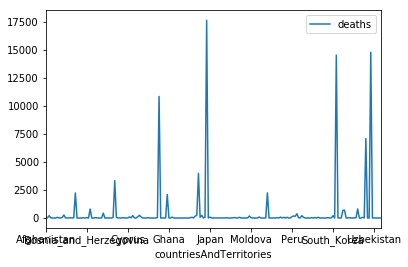

In [28]:
deaths_by_country.plot()

Podemos ajustar el tamaño de las gráficas por defecto con unas variables de matplotlib (la librería que Pandas usa para crear los gráficos). El tamaño en este caso es ancho y alto en "pulgadas". Esto es opcional pero en mi caso las gráficas serían más bonitas, prueba a ajustar si quieres el tamaño.

In [29]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 5]

La gráfica de arriba no es demásiado útil, ya que representar los datos de los 204 países no nos aporta muchos pero como ya sabemos filtrar datos y ordenaros, vamos a encadenar varias funciones y llamadas para tener una gráfica interesante. Le pasaremos como argumento `kind='bar'` para que los represente como barras, ya que en realidad no hay ninguna relación entre un punto y el anterior.

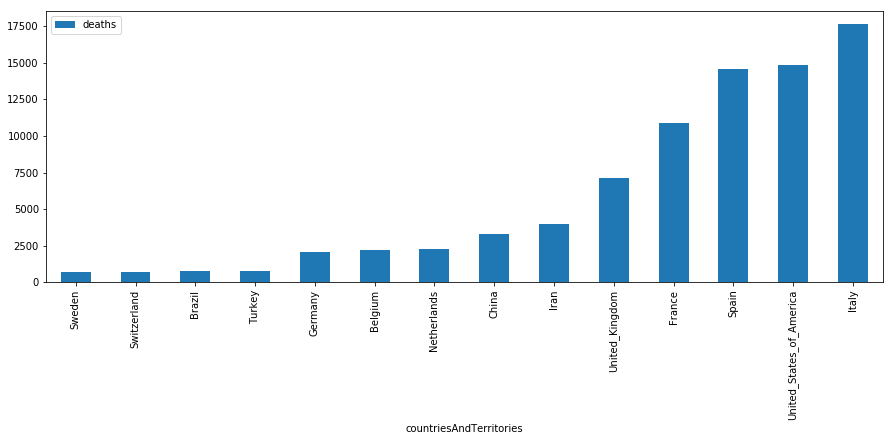

In [30]:
deaths_by_country[deaths_by_country['deaths'] > 500].sort_values('deaths').plot(kind='bar')

O podemos representar las muertes de un país ordenadas por fecha, podemos ver en este caso como ordenamos por varias columnas

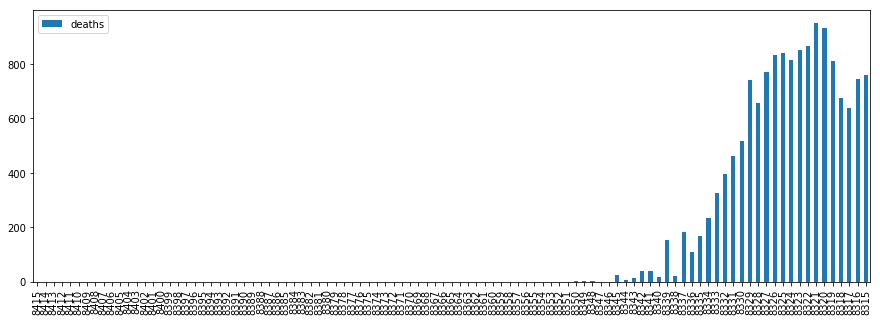

In [31]:
spain_deaths = covid[covid['countriesAndTerritories'] == 'Spain'].sort_values(['year','month','day'])[['dateRep','deaths']]
spain_deaths.plot(kind='bar')

Por supuesto, si en vez de usar una columna usamos varias, Pandas se ocupará de representar todos esos datos lo que nos permite mostrar en una gráfica los casos y las muertes.

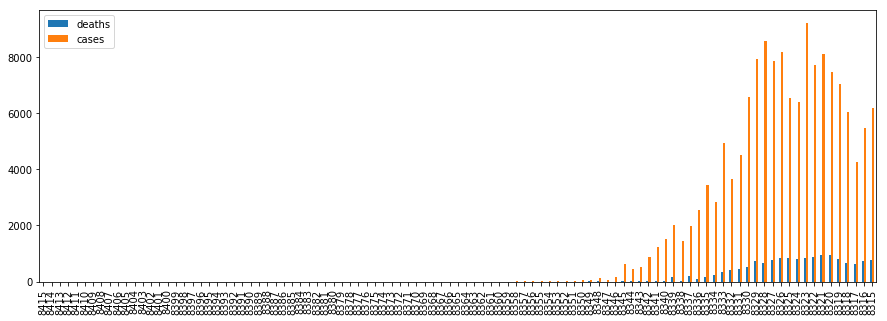

In [32]:
spain_death_cases = covid[covid['countriesAndTerritories'] == 'Spain'].sort_values(['year','month','day'])[['dateRep','deaths','cases']]
spain_death_cases.plot(kind='bar')

Si en vez de en una sola gráfica queremos tener varias podemos añadir el argumento `subplots=True` a la función `plot`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51cc3f9550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f51c57aae80>], dtype=object)

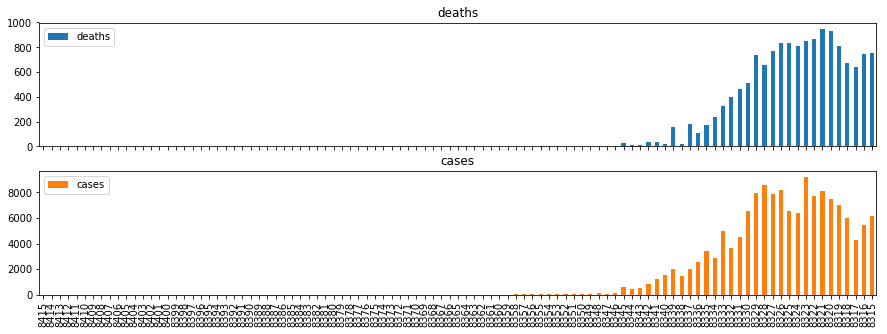

In [33]:
spain_death_cases.plot(kind='bar', subplots=True)

## Por ahora eso es todo

Y por ahora eso es todo. Esto nos debería dar una herramienta para hacer algunos trabajos básicos con algunos datos. Por supuesto quedan muchas cosas que hacer, algunas relacionadas con como afinar los gráficos lo que implica meterse en el apasionante mundo de matplotlib, o también como analizar esos datos, como mezclar varias fuentes de datos (estoy pensando en población de cada país, para sacar datos proporcionales), analizar tendencias y mucho más. 

Pero estos primeros pasos deberían servirnos para tener una idea de cómo usar esta fantástica herramienta que es Python.